## SARIMA

In [24]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from dieboldmariano import dm_test


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)


<Axes: title={'center': 'White Noise process'}, xlabel='Time'>

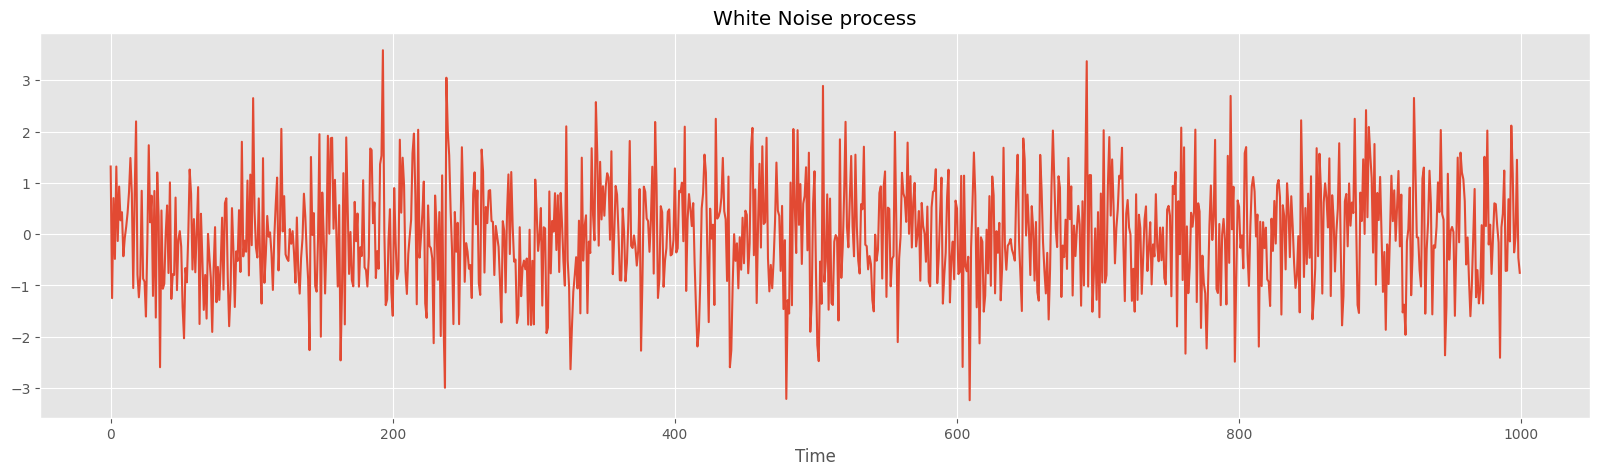

In [25]:
n_obs = 1000
sample = pd.Series(np.random.normal(size=n_obs))

plt.title('White Noise process')
plt.xlabel('Time')
sample.plot()

##### MA-процесс

Попробуем посимулировать и взглянуть на различные MA-процессы.

In [26]:
from statsmodels.api import tsa

Начнём с процесса белого шума, или MA(0):

$$y_t = \mu + \epsilon_t, \ \epsilon_t \sim iid N(0, 1)$$

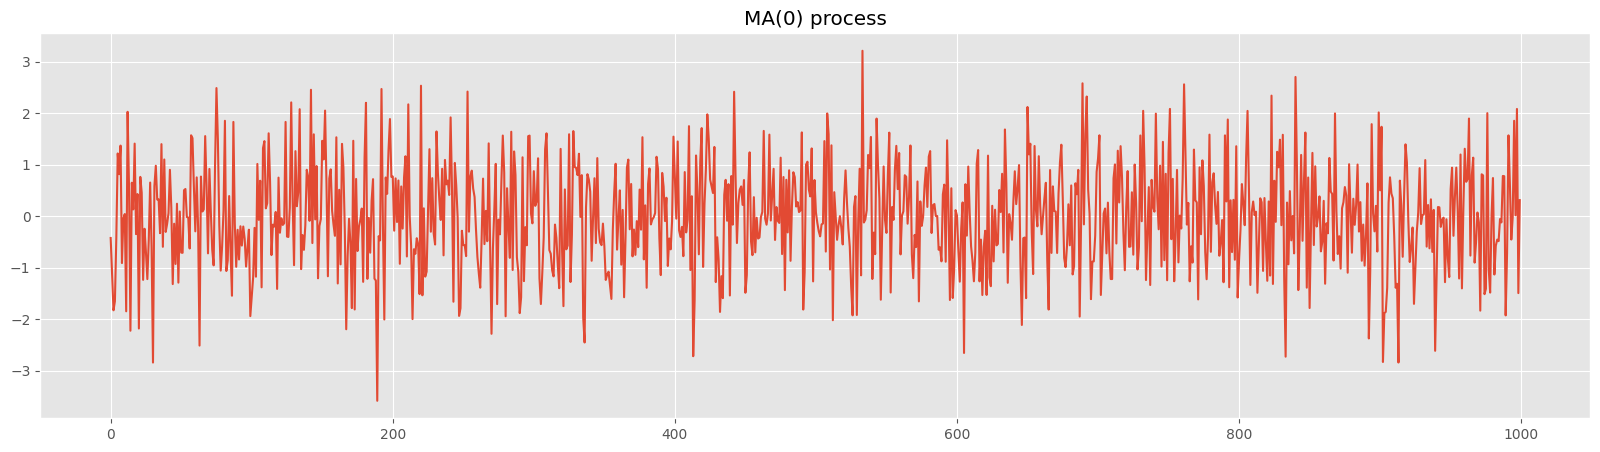

In [27]:
wn_process = tsa.ArmaProcess()
sample = pd.Series(wn_process.generate_sample(nsample=n_obs, burnin = 1000))
sample.plot()
plt.title('MA(0) process');

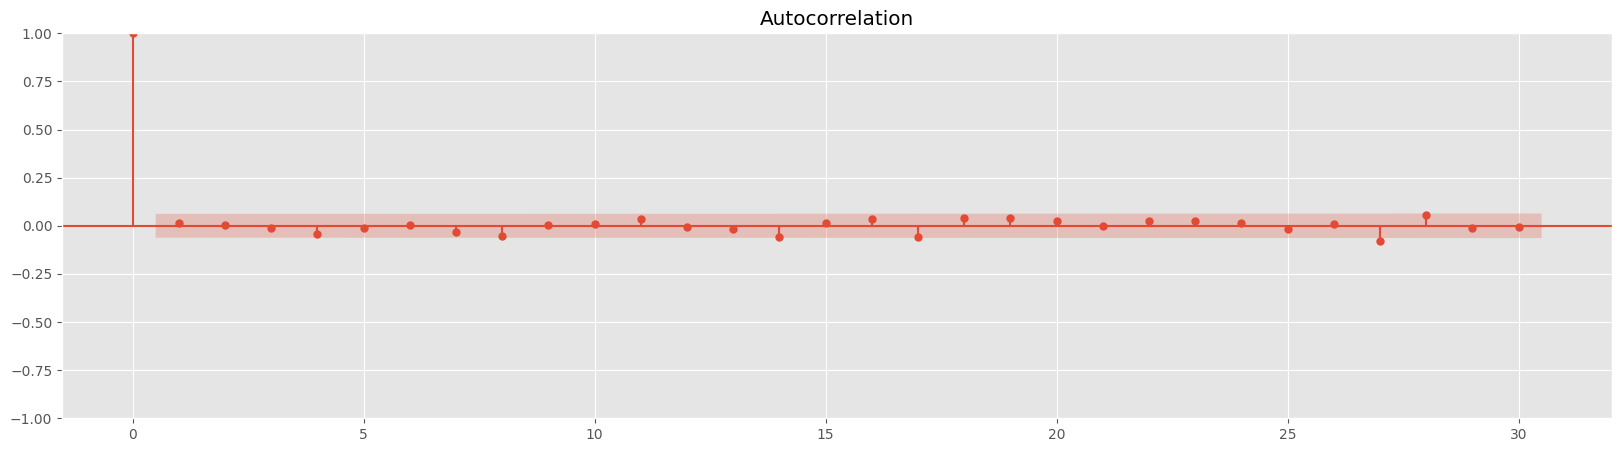

In [28]:
plot_acf(sample);

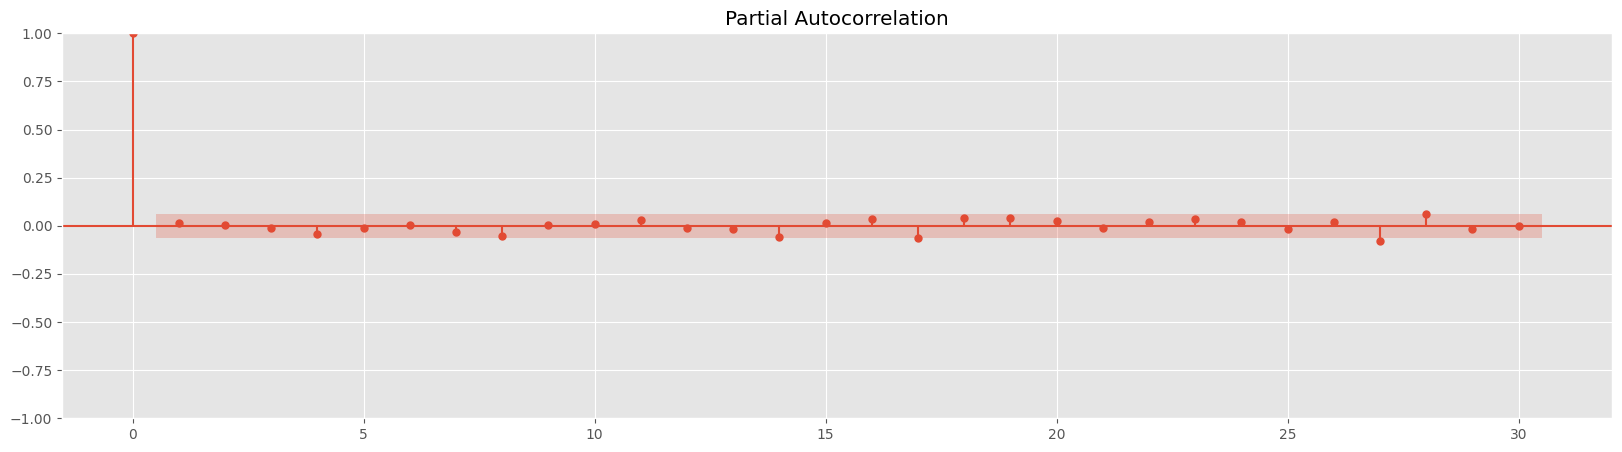

In [29]:
plot_pacf(sample);

Теперь MA(1):

$$y_t = \mu + \epsilon_t + 0.9 \epsilon_{t-1}, \ \epsilon_t \sim iid N(0, 1)$$

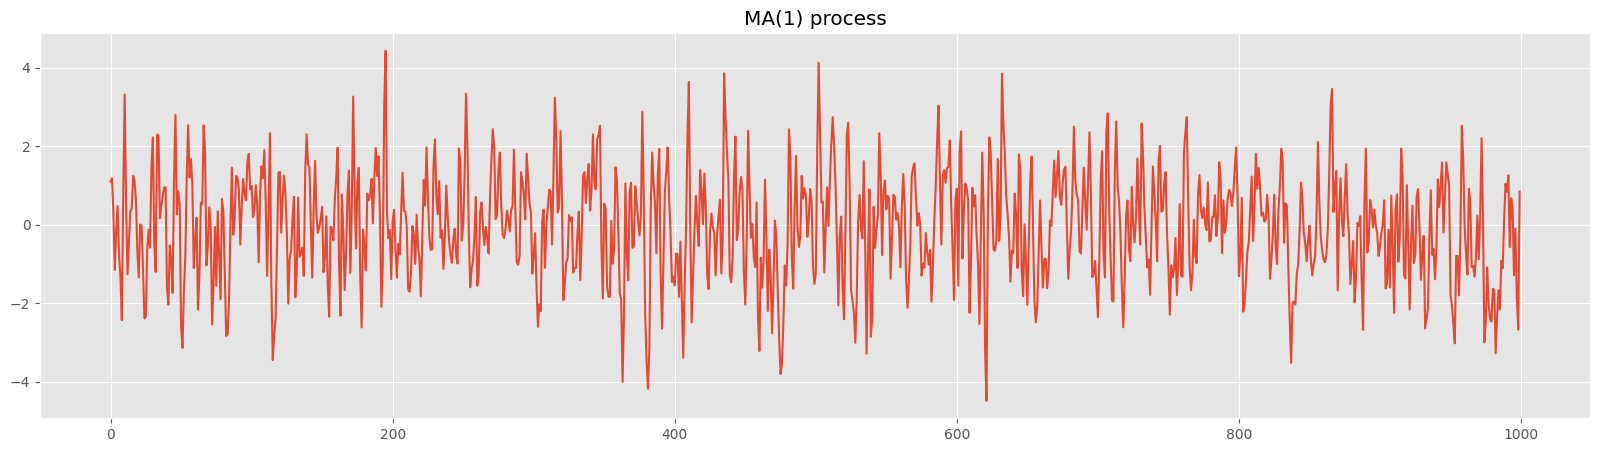

In [30]:
ma_process = tsa.ArmaProcess(ma=[1, 0.9])
sample = pd.Series(ma_process.generate_sample(nsample=n_obs, burnin = 10000))
sample.plot()
plt.title('MA(1) process');

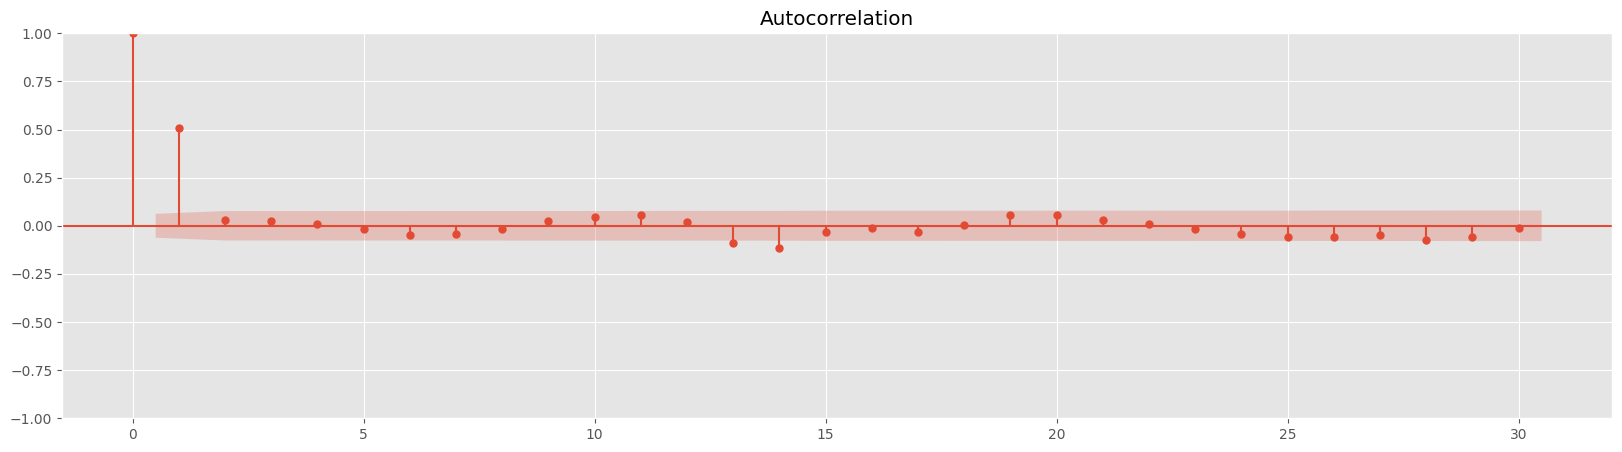

In [31]:
plot_acf(sample);


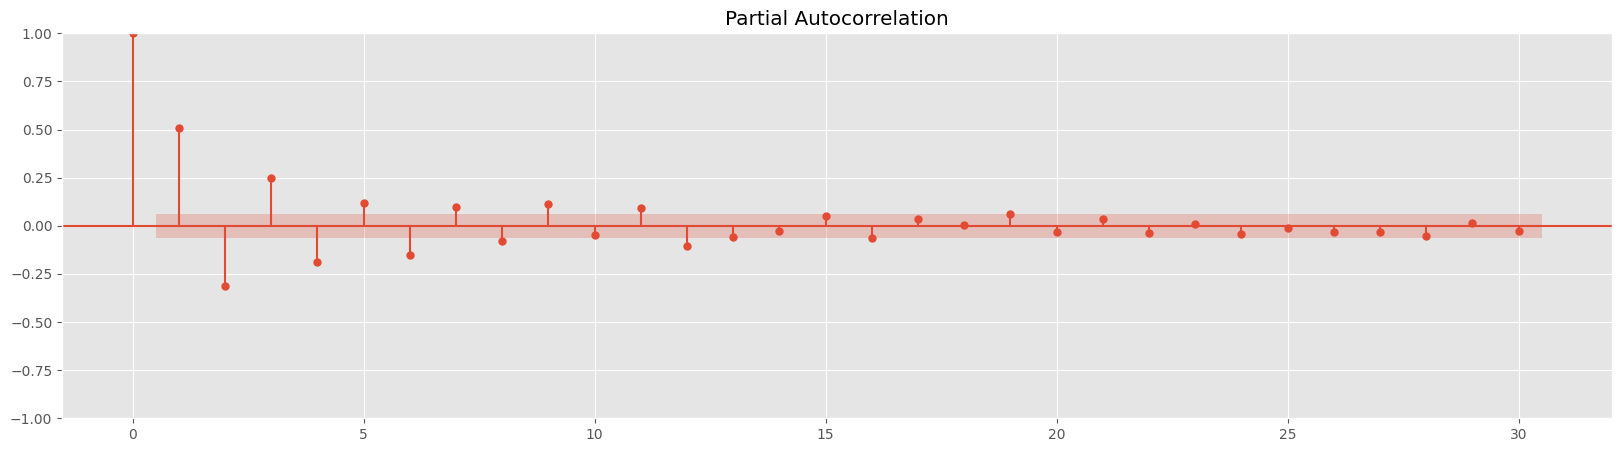

In [32]:
plot_pacf(sample);

MA(5):

$$y_t = \mu + \epsilon_t + 0.9 \epsilon_{t-1} + 0.8 \epsilon_{t-2} + 0.5 \epsilon_{t-3} + 0.6 \epsilon_{t-4} + 0.2 \epsilon_{t-5}, \ \epsilon_t \sim iid N(0, 1)$$

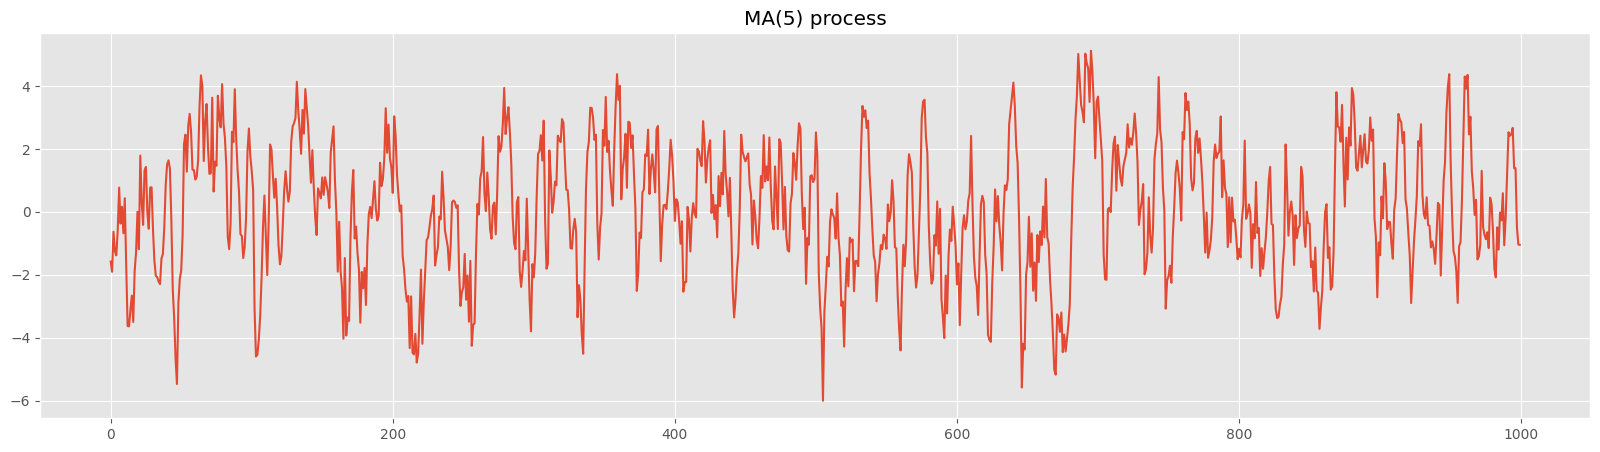

In [33]:
ma_process = tsa.ArmaProcess(ma=[1, 0.9, 0.8, 0.5, 0.6, 0.2])
sample = pd.Series(ma_process.generate_sample(nsample=n_obs, burnin = 1000))
sample.plot()
plt.title('MA(5) process');

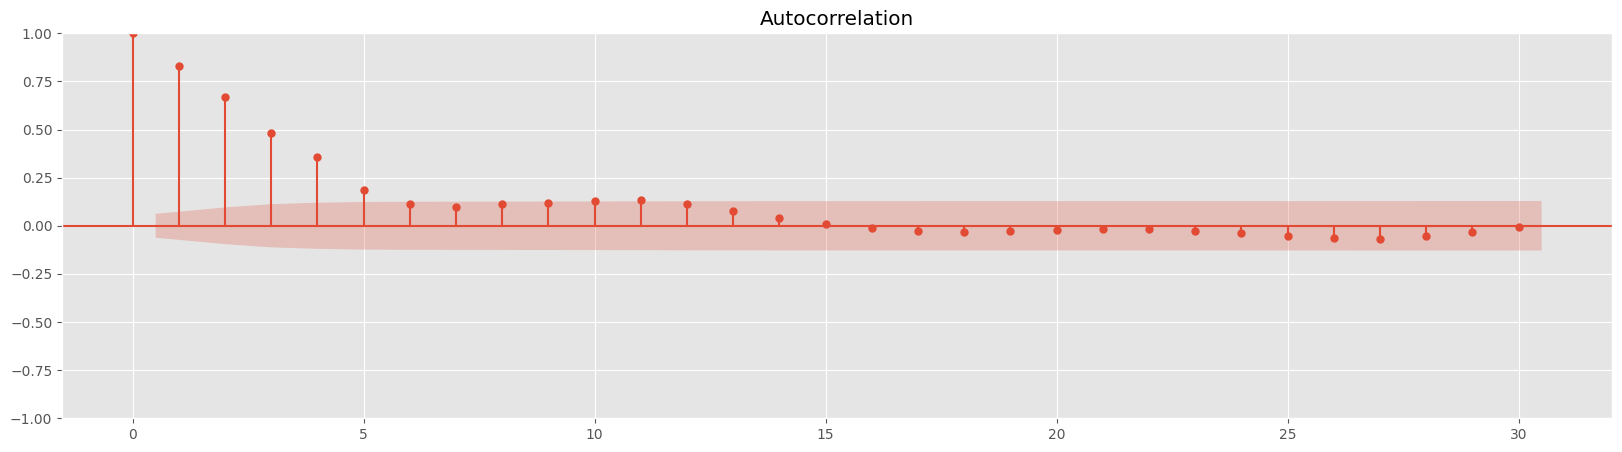

In [34]:
plot_acf(sample);

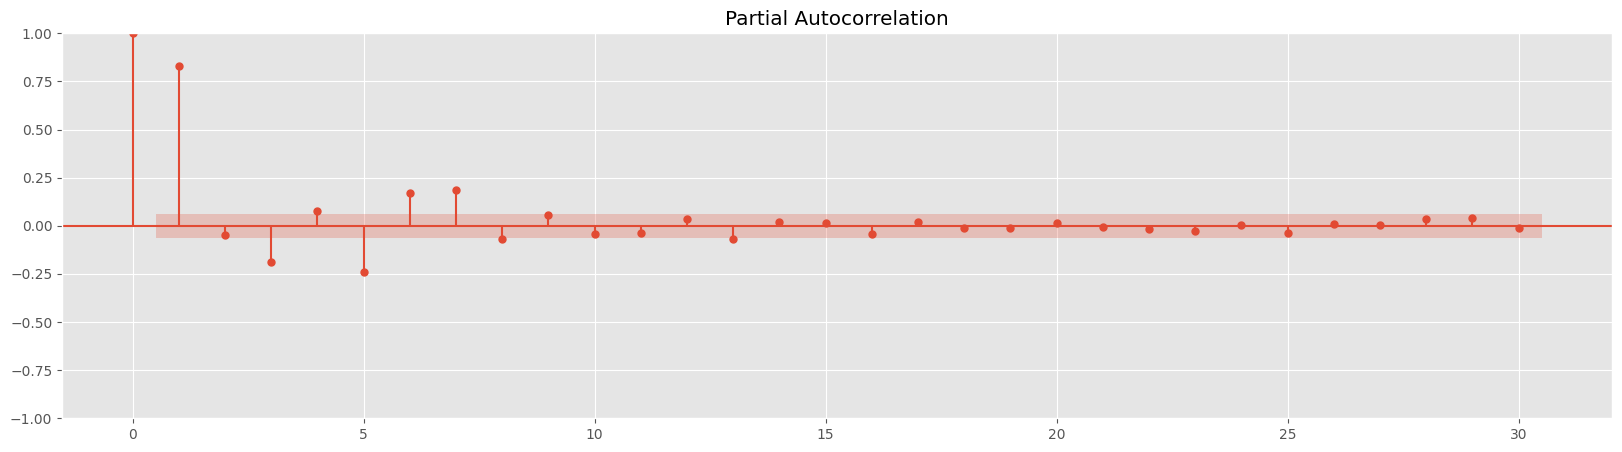

In [35]:
plot_pacf(sample);

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.api import tsa



plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)

### AR(p)-процесс

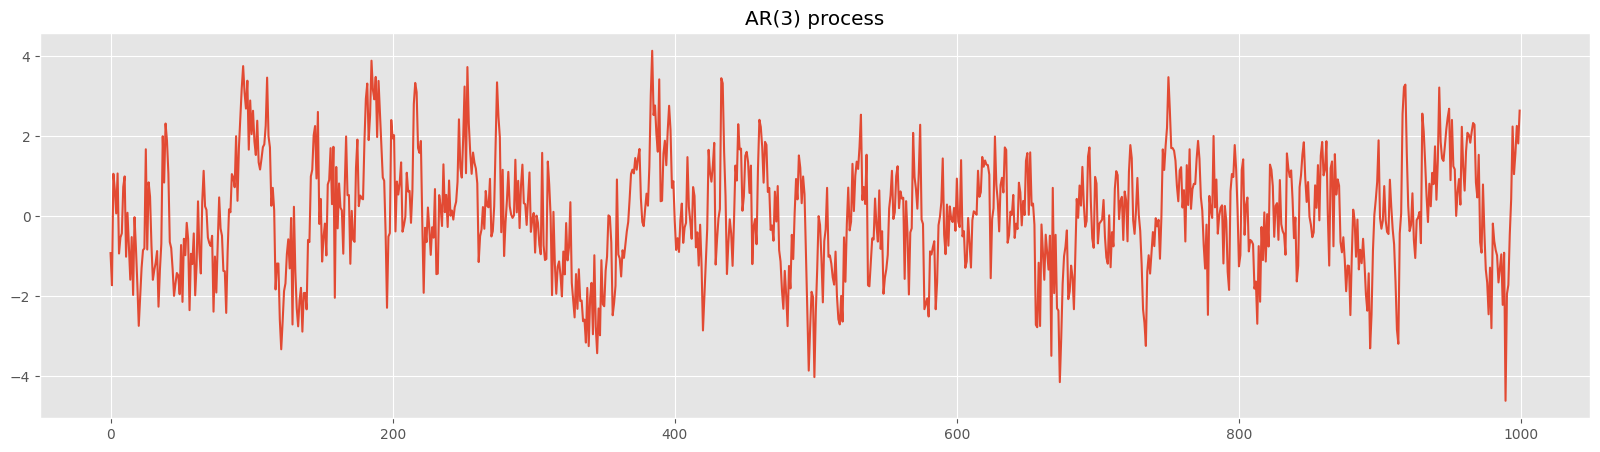

In [39]:
ma_process = tsa.ArmaProcess(ar=[1, -0.5, -0.25])
sample = pd.Series(ma_process.generate_sample(nsample=1000, burnin = 10000))
sample.plot()
plt.title('AR(3) process');

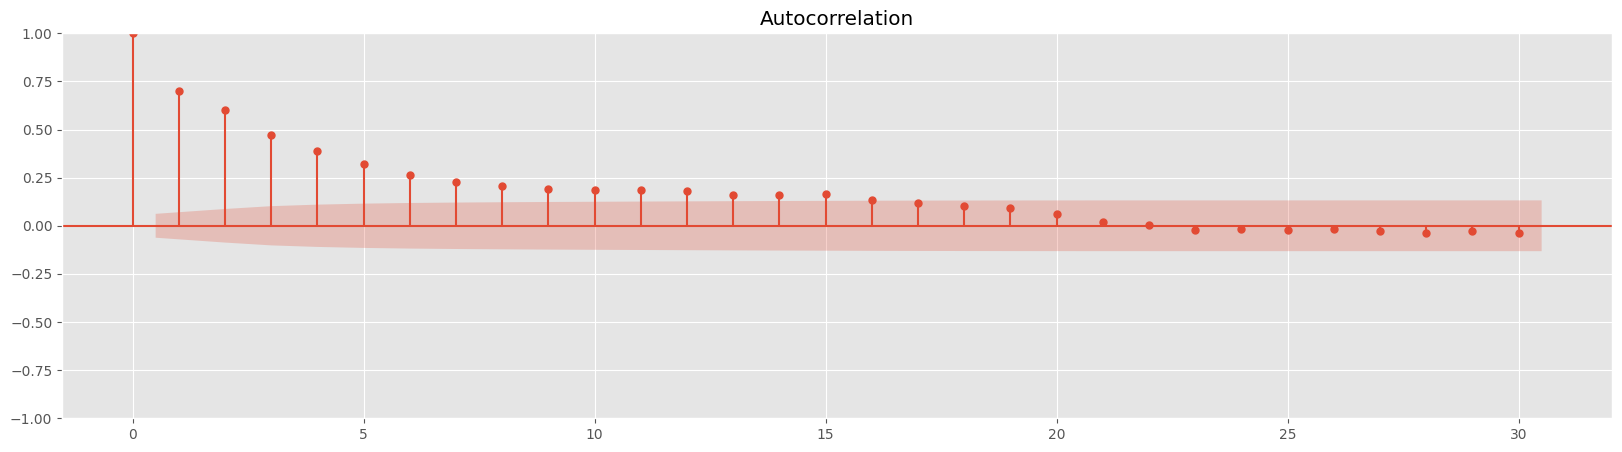

In [40]:
plot_acf(sample);

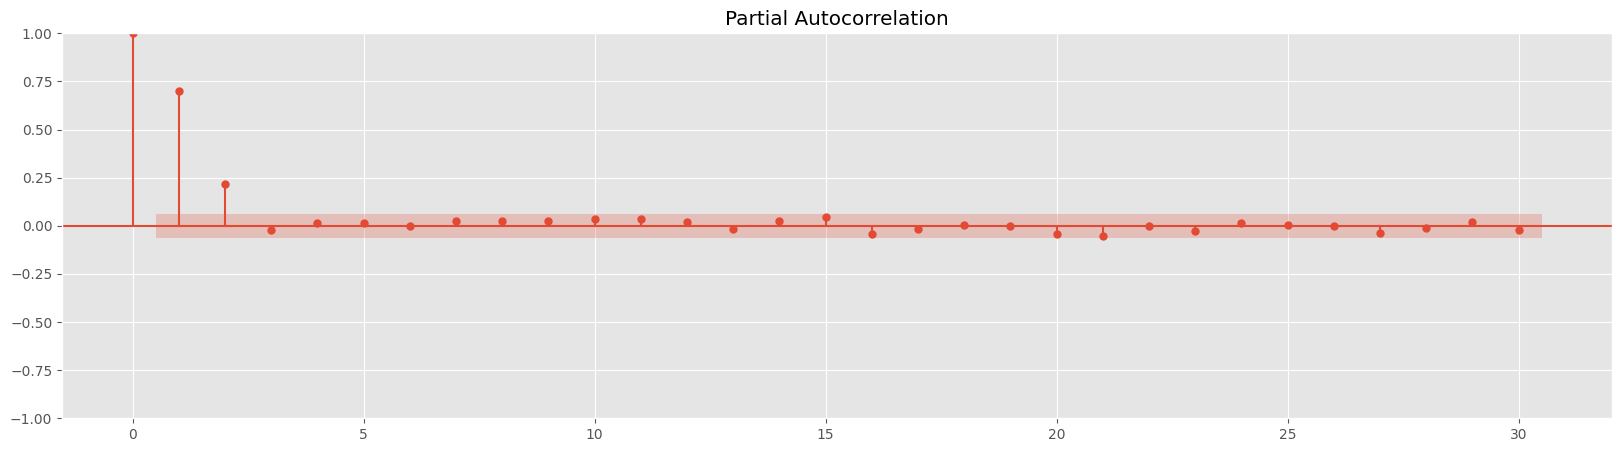

In [41]:
plot_pacf(sample);

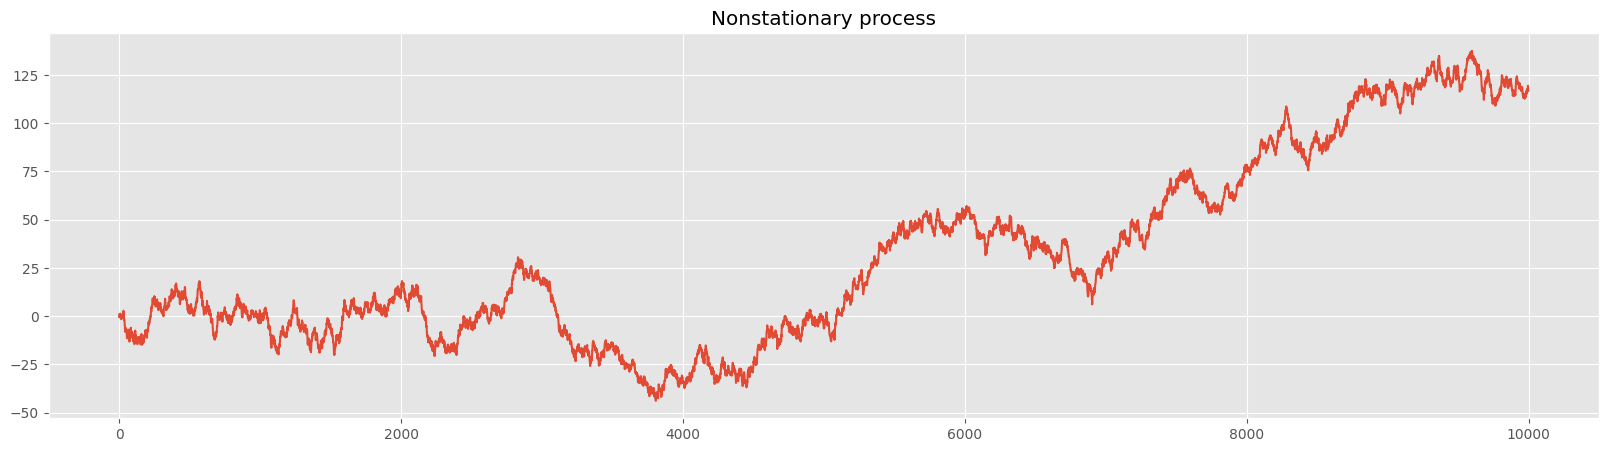

In [48]:
nonstationary_process = tsa.ArmaProcess(ar=[1, -1])
sample = pd.Series(nonstationary_process.generate_sample(nsample=10000, burnin = 10000))
sample.plot()
plt.title('Nonstationary process');


In [49]:
nonstationary_process.isstationary

False

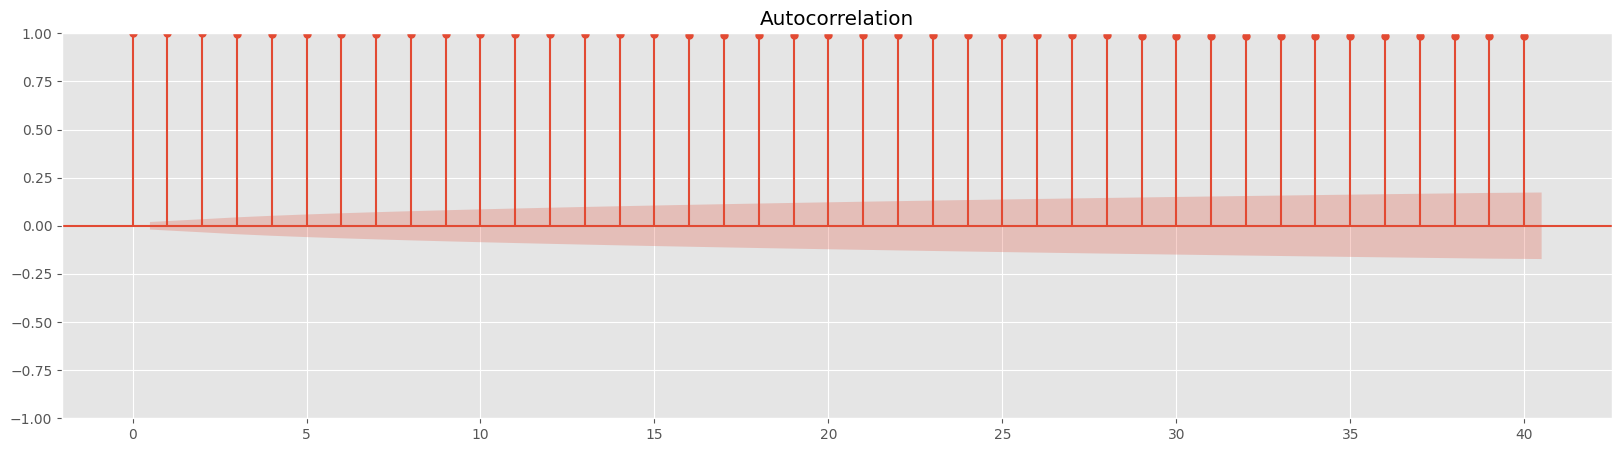

In [50]:
plot_acf(sample);

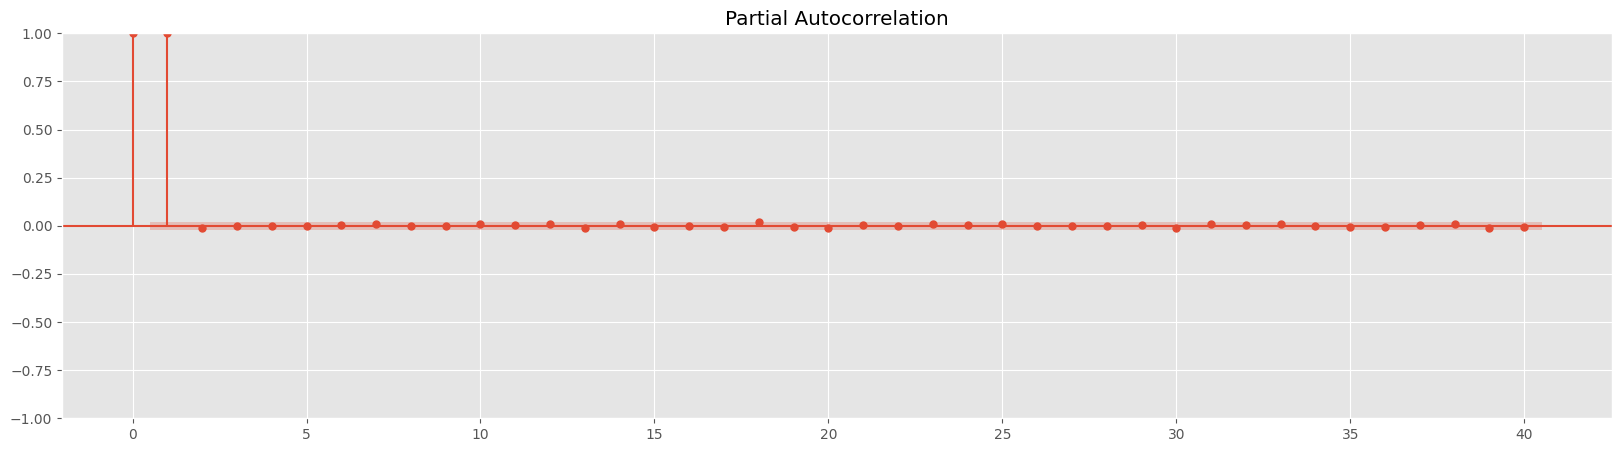

In [51]:
plot_pacf(sample);

### Примеры нестационарных рядов

In [40]:
beta_0 = 1
beta_1 = 0.5
sigma_sq = 16
n_steps = 1000

# Ряд с детерминированным трендом
y_det = [beta_0 + beta_1 * t + np.random.normal(scale=sigma_sq) for t in range(n_steps)]

# Ряд со стохастическим трендом
y_stoch = [0]
[y_stoch.append(beta_0 + y_stoch[-1] + np.random.normal(scale=sigma_sq)) for t in range(n_steps)]

y_det = pd.Series(y_det)
y_stoch = pd.Series(y_stoch)

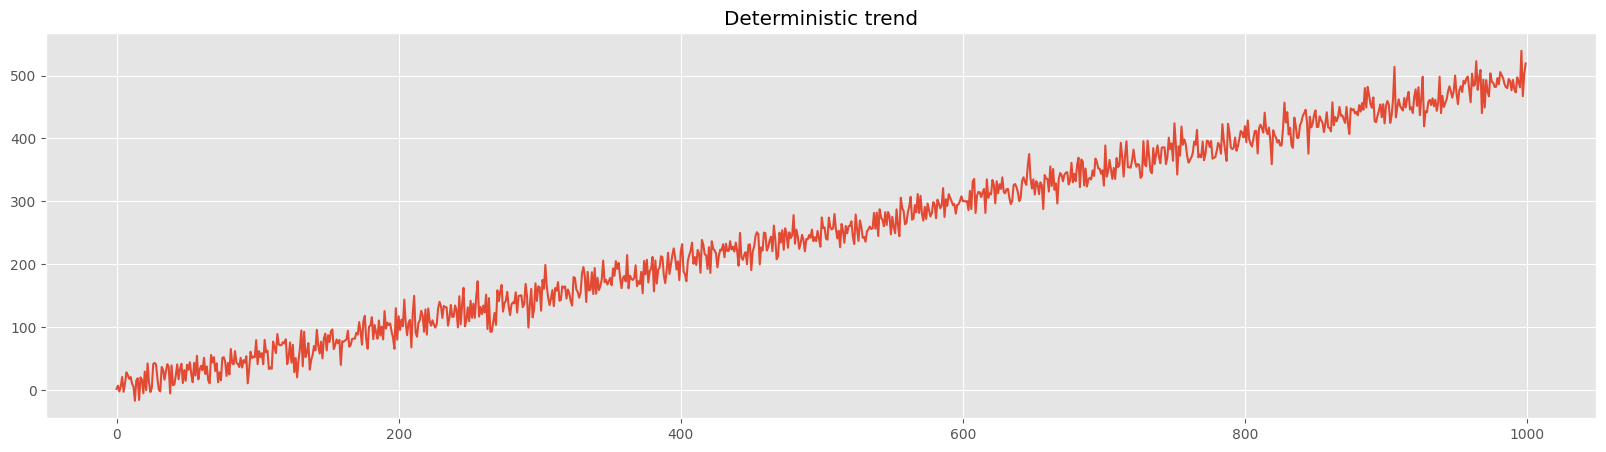

In [41]:
y_det.plot()
plt.title("Deterministic trend");

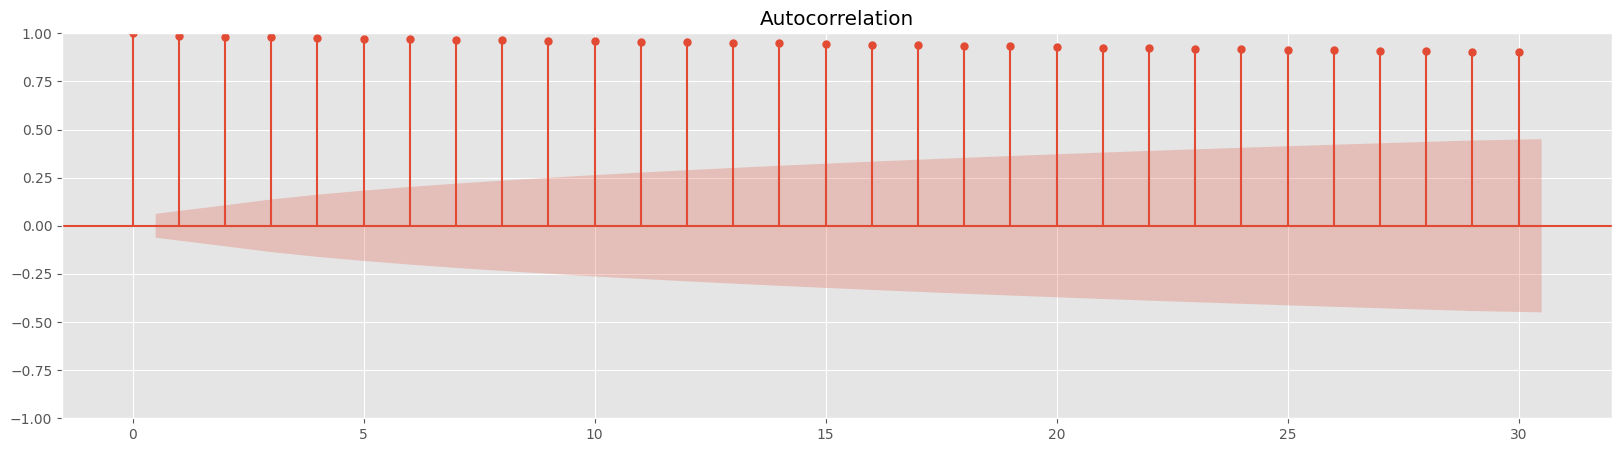

In [42]:
plot_acf(y_det);

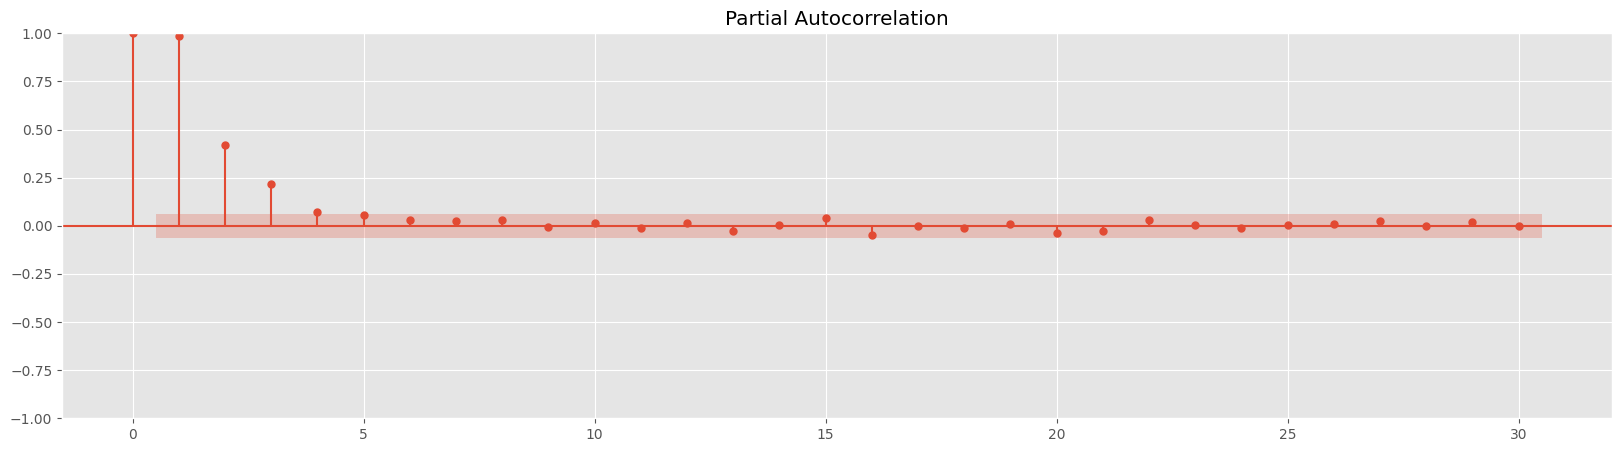

In [43]:
plot_pacf(y_det);

<Axes: >

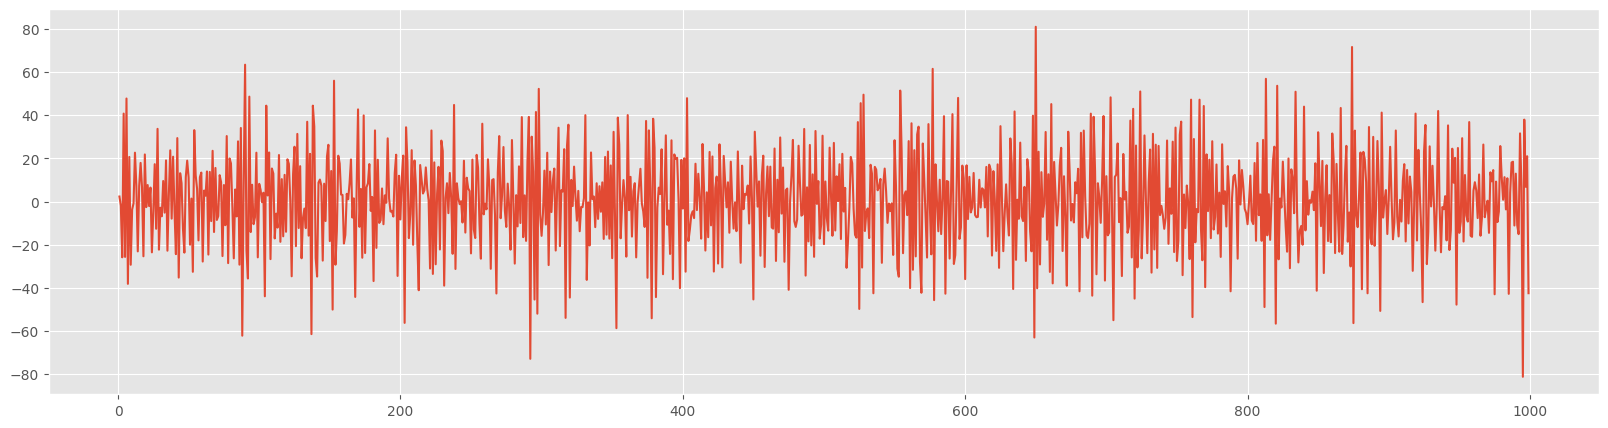

In [205]:
y_det.diff().dropna().plot()

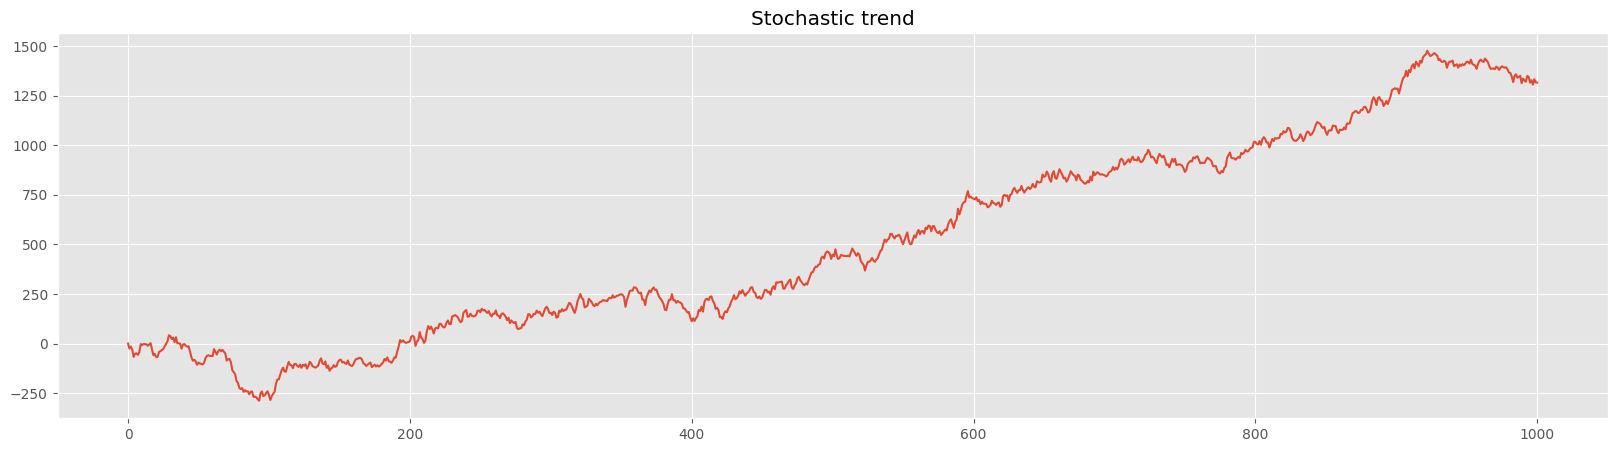

In [44]:
# Ряд со стохастическим трендом
y_stoch = [0]
[y_stoch.append(beta_0 + y_stoch[-1] + np.random.normal(scale=sigma_sq)) for t in range(n_steps)]

y_stoch = pd.Series(y_stoch)
y_stoch.plot()
plt.title("Stochastic trend");

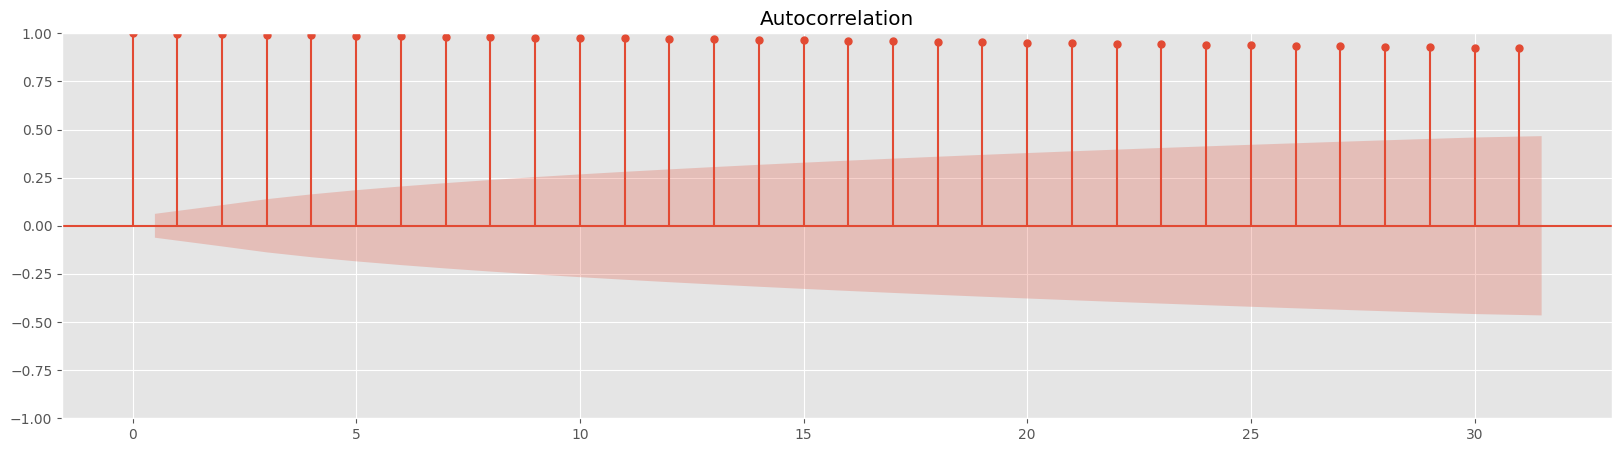

In [45]:
plot_acf(y_stoch);


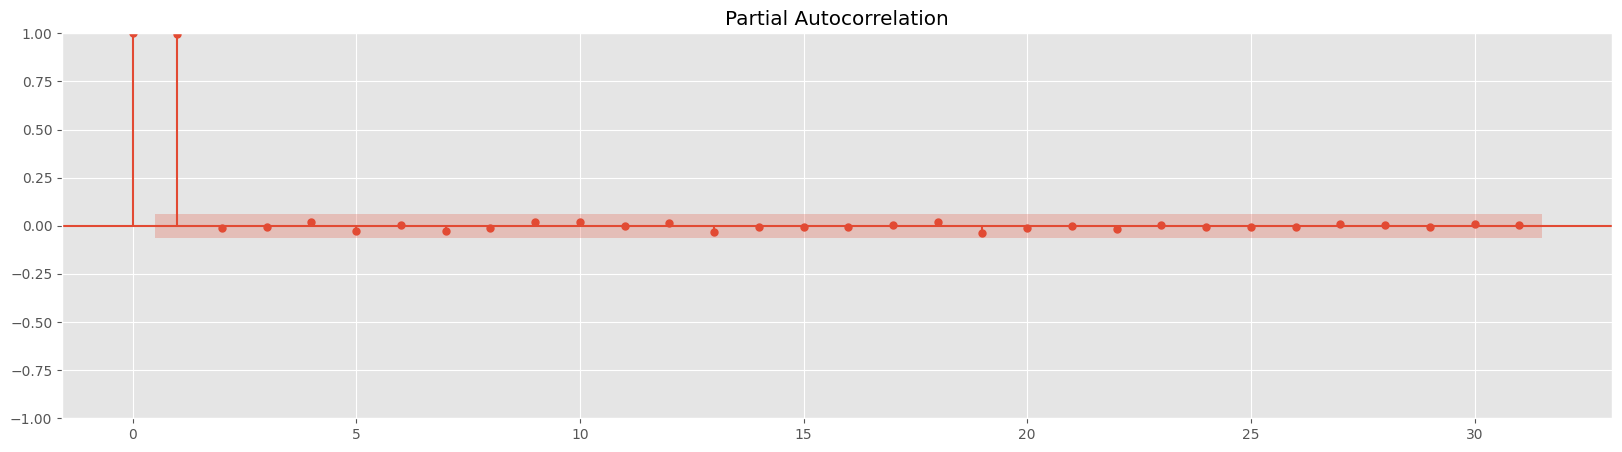

In [46]:
plot_pacf(y_stoch);


<Axes: >

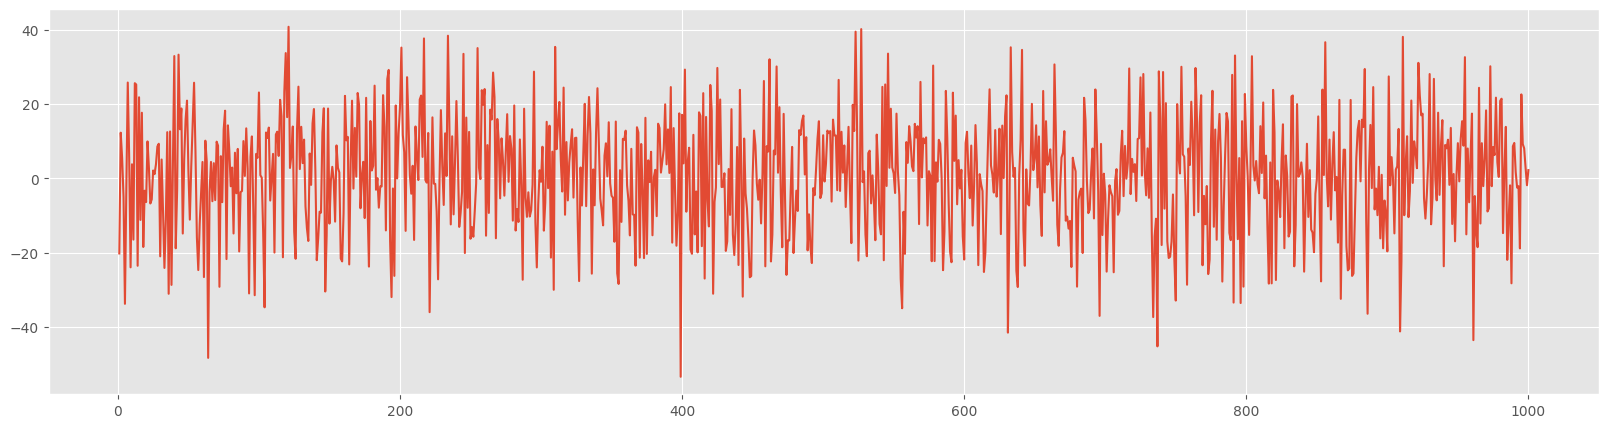

In [208]:
y_stoch.diff().dropna().plot()

Теперь посмотрим на какие-нибудь нестационарные процессы и попытаемся оценить на них ARIMA-модель.

In [89]:
data = sm.datasets.macrodata.load_pandas().data

data = data['pop']
data.index = pd.date_range('01.01.1959',freq='QS',periods=len(data))

<Axes: >

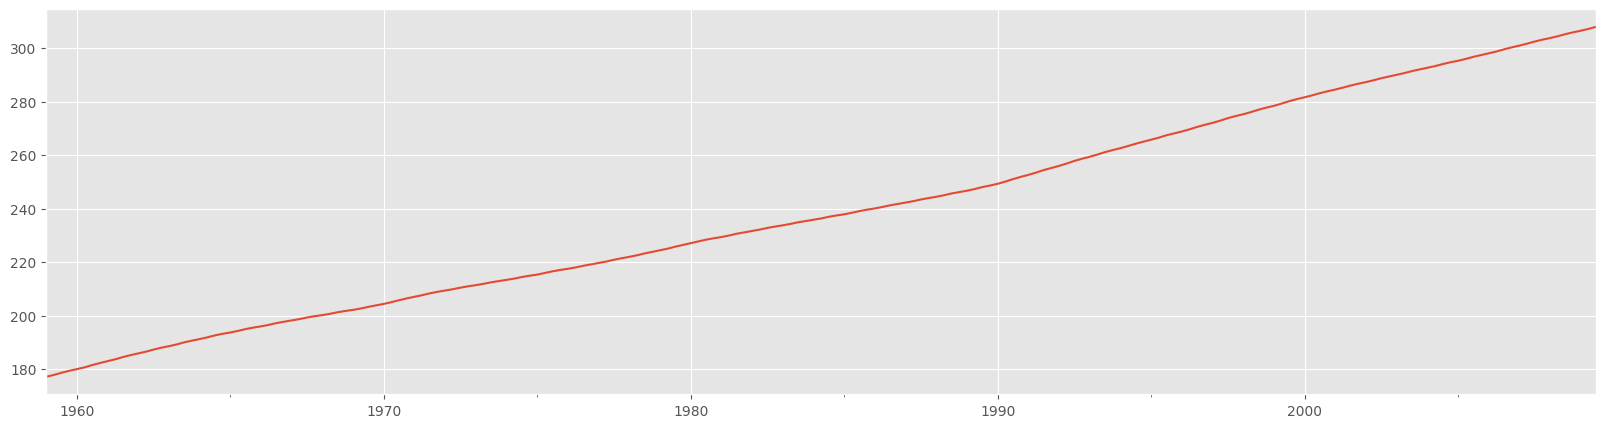

In [90]:
data.plot()

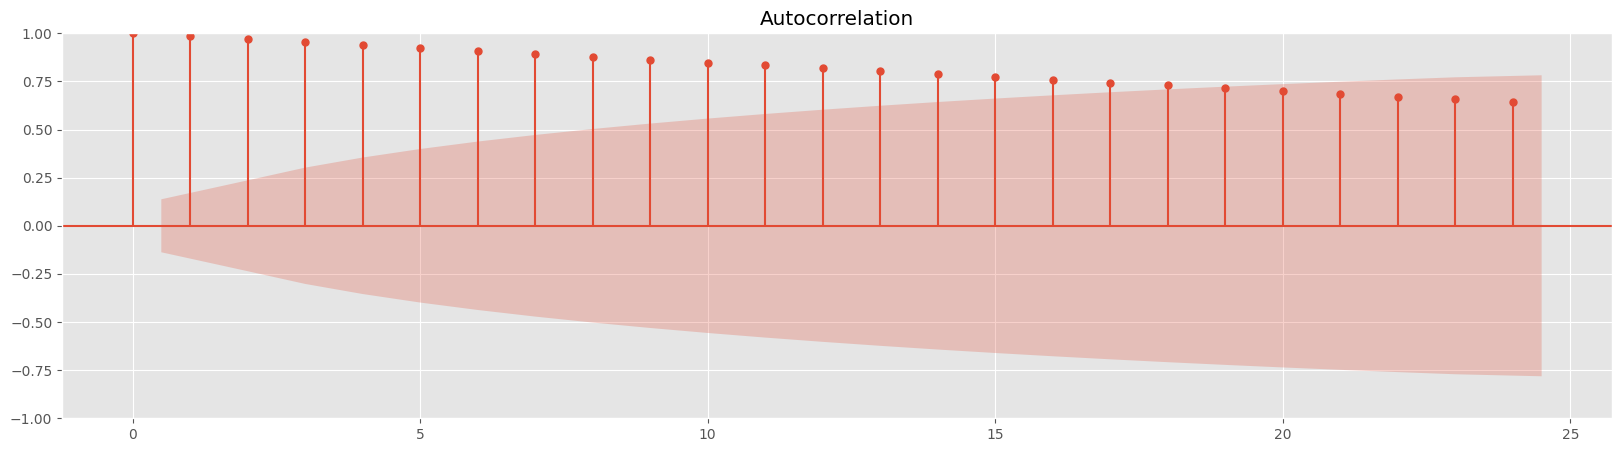

In [91]:
plot_acf(data);

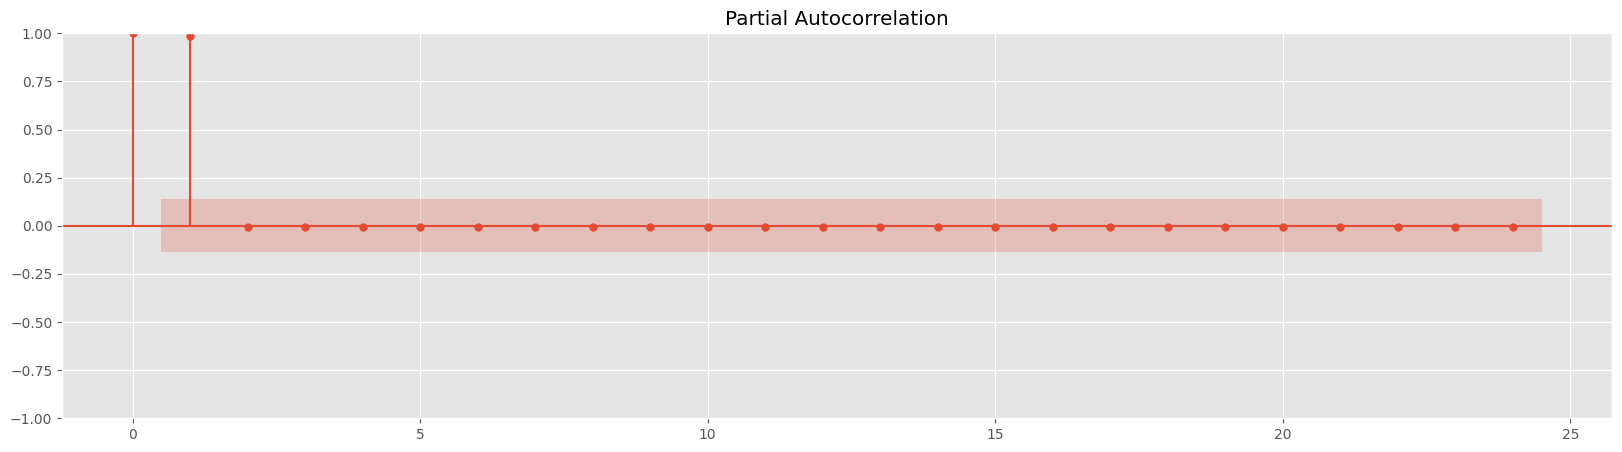

In [92]:
plot_pacf(data);

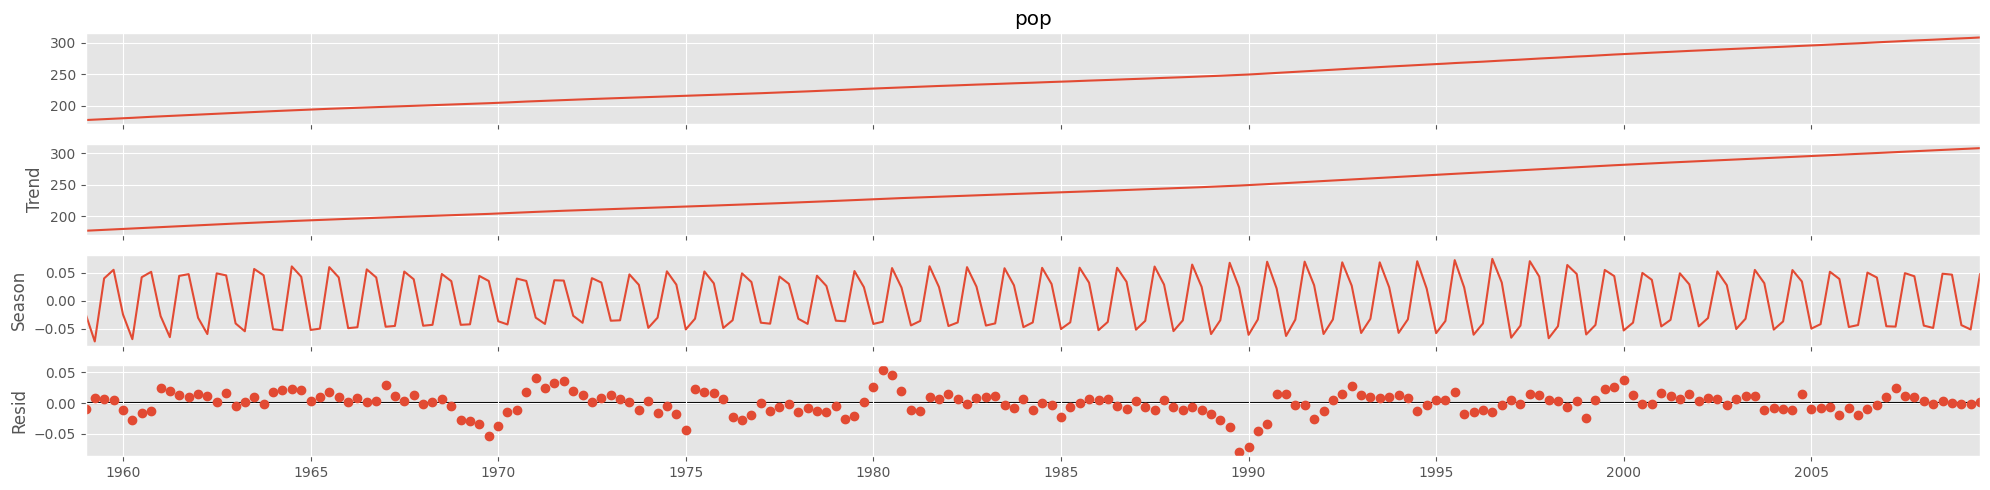

In [93]:
res = STL(data,period=4).fit()

res.plot();

In [94]:
1 - np.var(res.resid) / np.var(res.resid + res.seasonal)
# D = 1

np.float64(0.8687409079923327)

In [95]:
data = data.diff(4).dropna()

<Axes: >

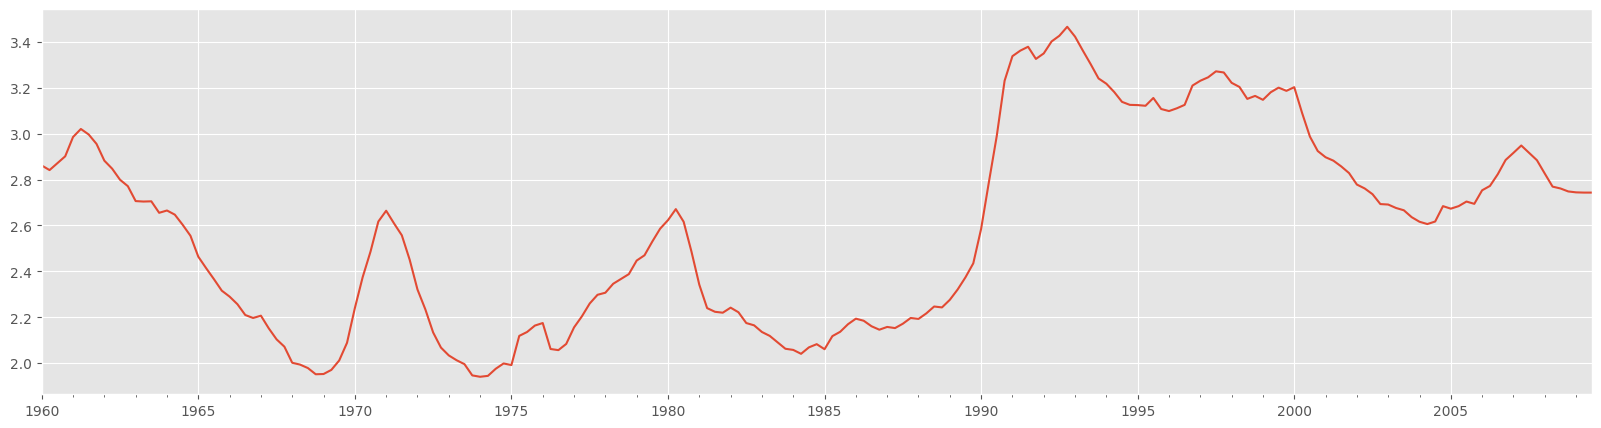

In [96]:
data.plot()

# d = ?

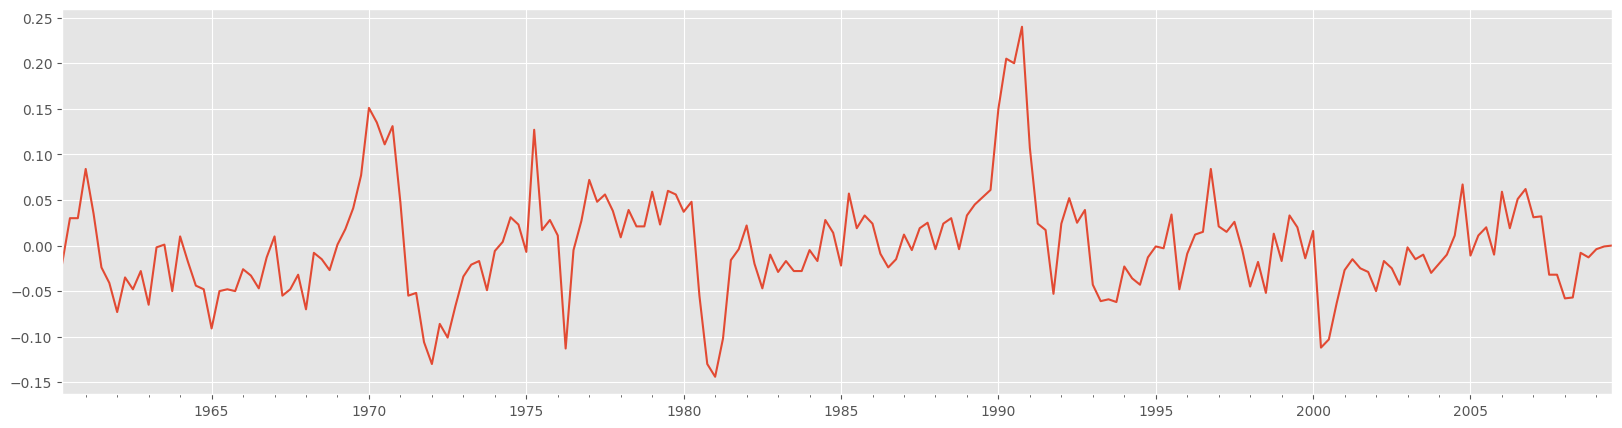

In [97]:
data.diff().dropna().plot();

In [98]:
kpss(data, regression='c')
# d = 1

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_6758/1421070785.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(data, regression='c')


(np.float64(0.7728549057234547),
 np.float64(0.01),
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [99]:
data = data.diff()
# D = 1, d = 1

<Axes: >

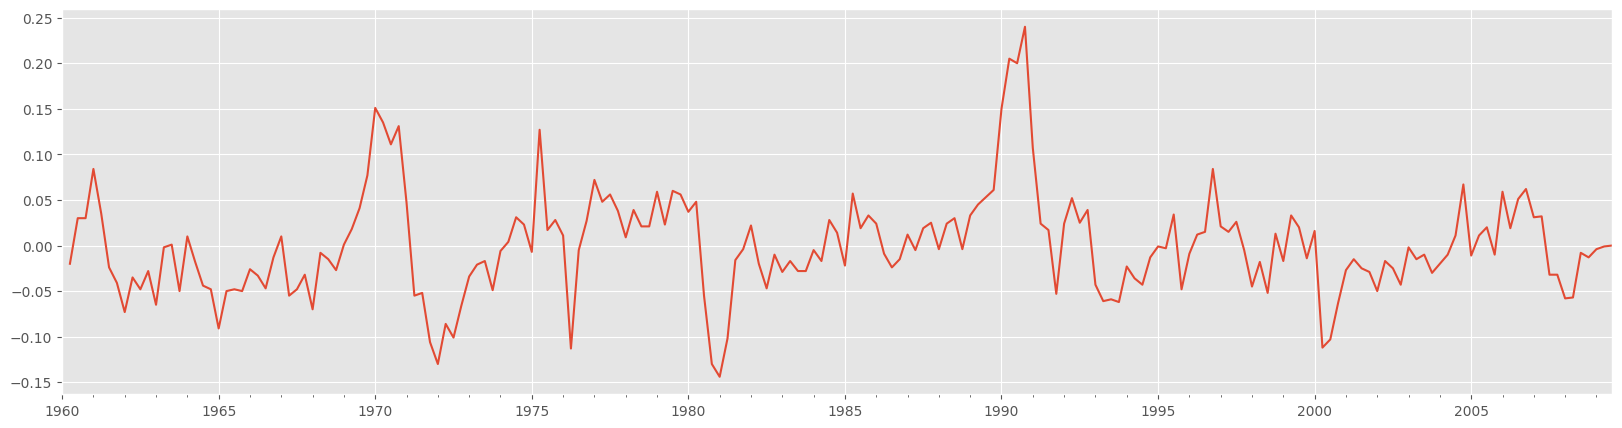

In [100]:
data.plot()

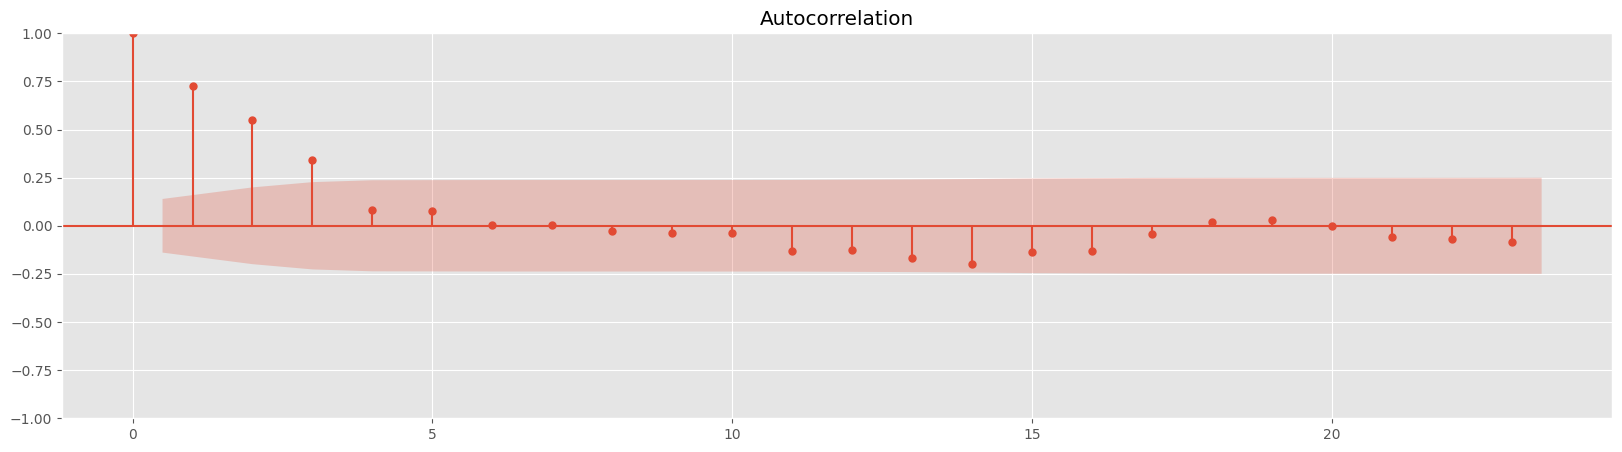

In [103]:
plot_acf(data.dropna());

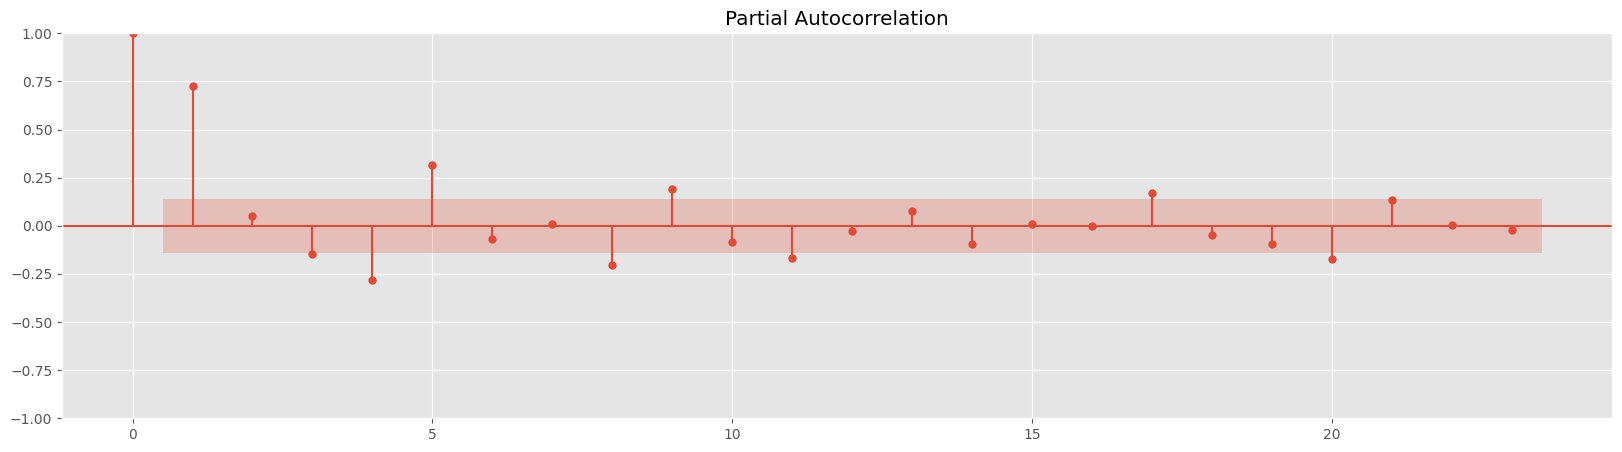

In [104]:
plot_pacf(data.dropna());

In [76]:
kpss(data.dropna())

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_6758/3587401141.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(data.dropna())


(np.float64(0.10495544872270902),
 np.float64(0.1),
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [78]:
data = sm.datasets.macrodata.load_pandas().data

data = data['pop']
data.index = pd.date_range('01.01.1959',freq='QS',periods=len(data))

In [79]:
# D = 0, d = ?

<Axes: >

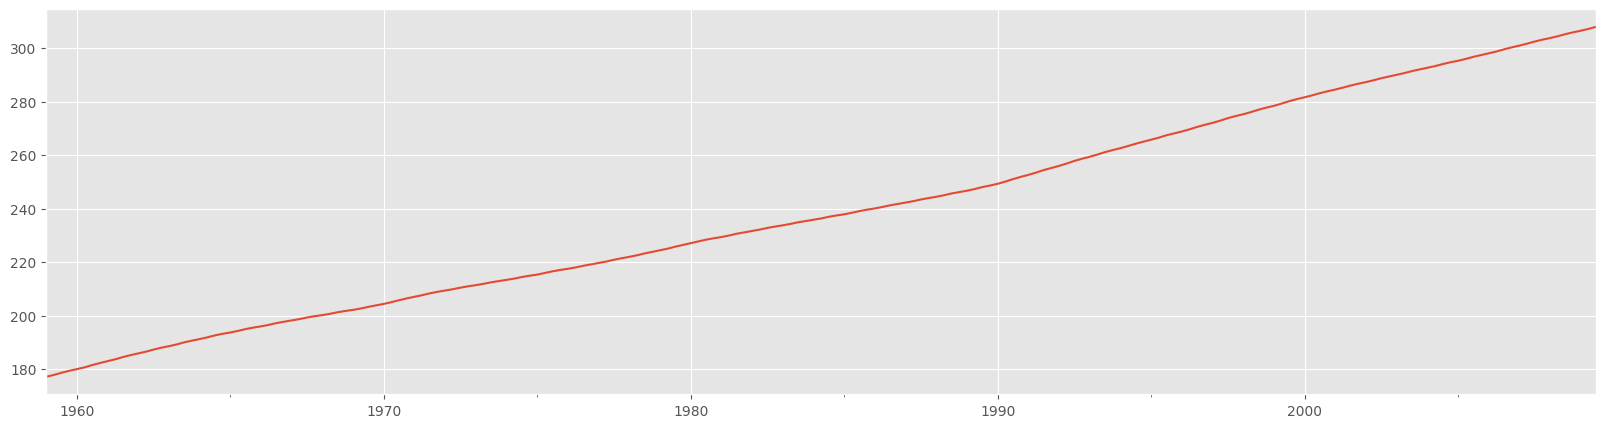

In [80]:
data.plot()

In [81]:
kpss(data, regression="ct")

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_6758/1763010992.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(data, regression="ct")


(np.float64(0.4939988109239873),
 np.float64(0.01),
 9,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

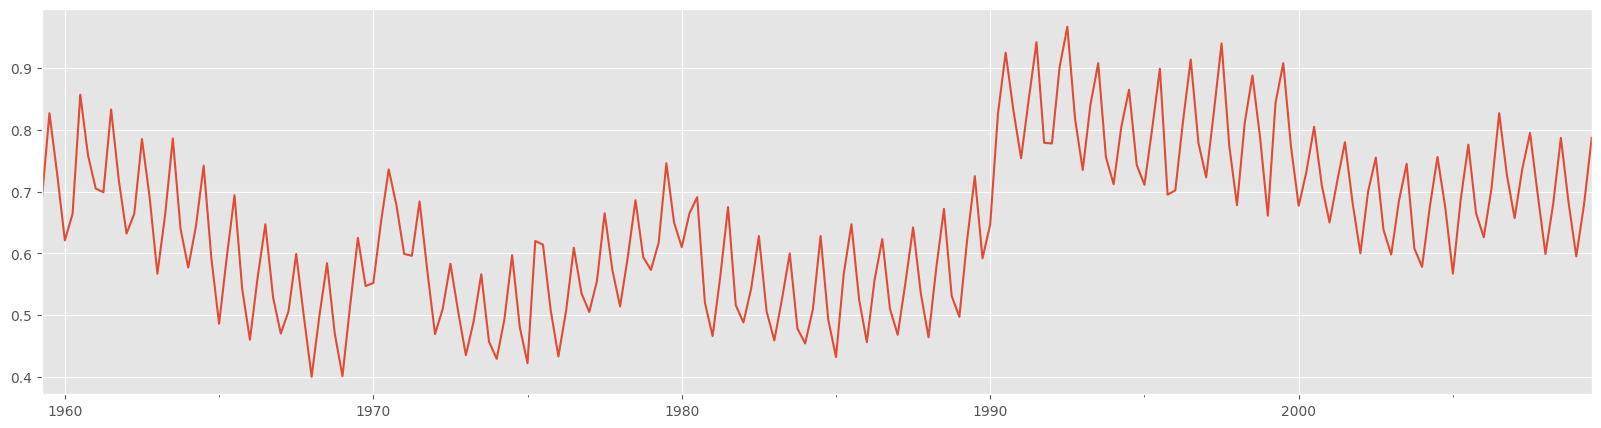

In [ ]:
data = data.diff().dropna()
data.plot();
# d = 1

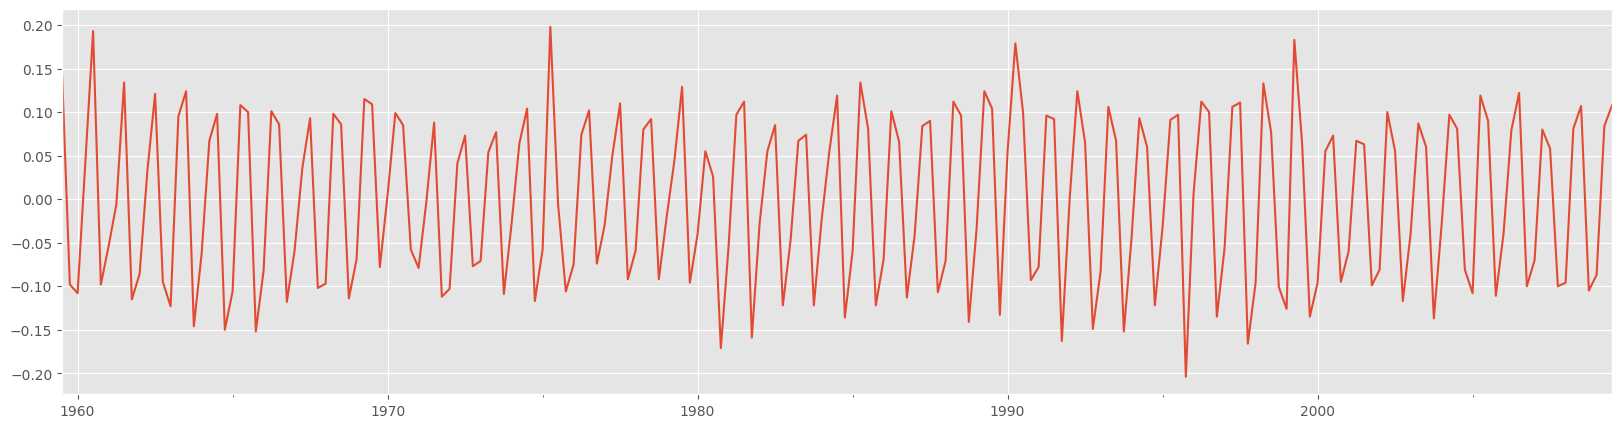

In [83]:
data = data.diff().dropna()
data.plot();
# d = 2

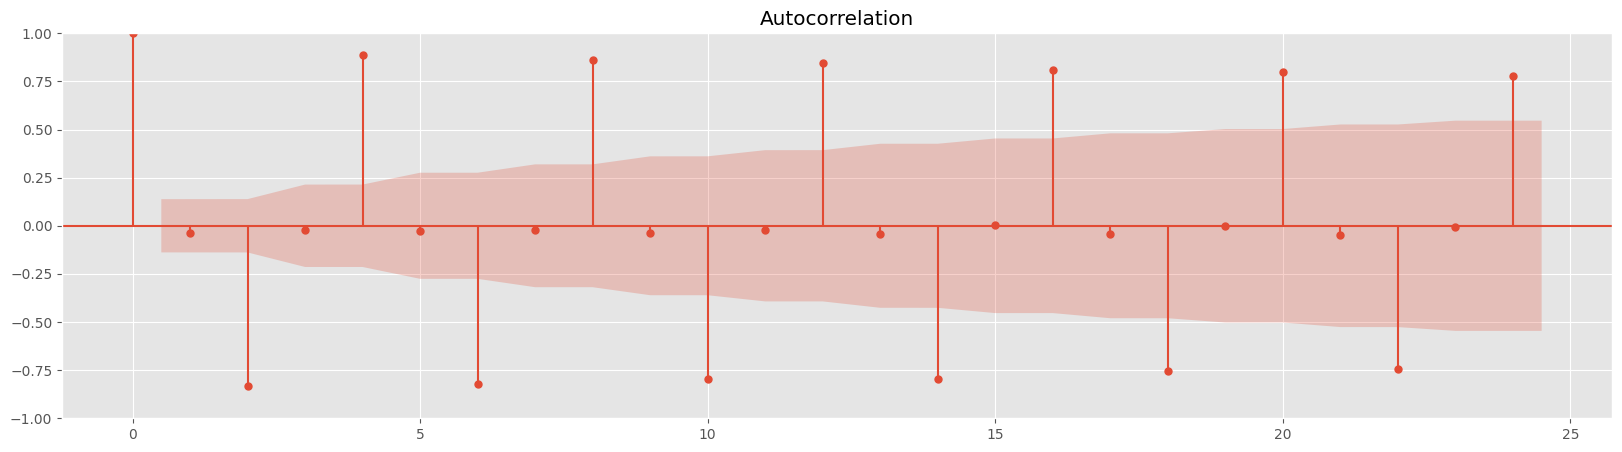

In [86]:
plot_acf(data);

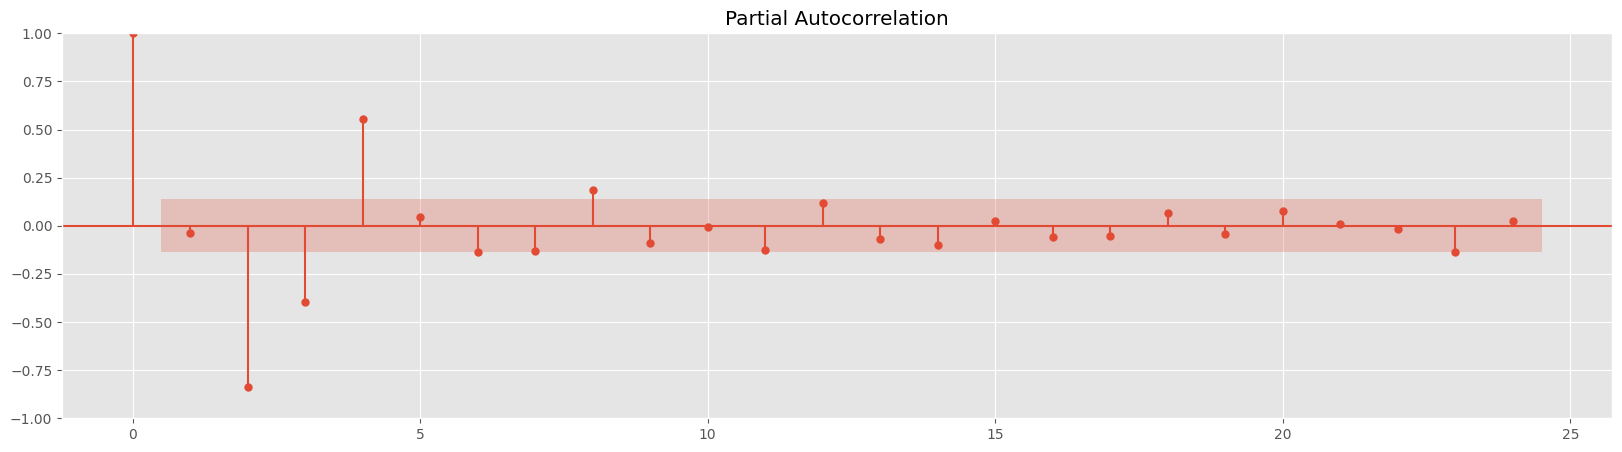

In [88]:
plot_pacf(data);

In [84]:
kpss(data, regression='c')

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_6758/866024529.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(data, regression='c')


(np.float64(0.0887050742224534),
 np.float64(0.1),
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
# 1) D = 1, d = 1
# 2) D = 0, d = 2